In [1]:

SEU_NOME = "Roger da Silva Ferreira"  

print("👤 IDENTIFICAÇÃO DO PROJETO")
print("=" * 40)
print(f"Integrante: {SEU_NOME}")
print("Data Preprocessing Pipeline")
print("Projeto: Previsão de Churn em Telecomunicações")

# Criar arquivo grupo.txt
print("\n💾 Criando arquivo grupo.txt...")

conteudo = f"""Nomes completos dos integrantes:

1. {SEU_NOME}

Pipeline de Pré-Processamento de Dados
Projeto: Previsão de Churn em Telecomunicações"""

with open('grupo.txt', 'w', encoding='utf-8') as f:
    f.write(conteudo)

print("✅ Arquivo 'grupo.txt' criado com sucesso!")

👤 IDENTIFICAÇÃO DO PROJETO
Integrante: Roger da Silva Ferreira
Data Preprocessing Pipeline
Projeto: Previsão de Churn em Telecomunicações

💾 Criando arquivo grupo.txt...
✅ Arquivo 'grupo.txt' criado com sucesso!


# Projeto: Pipeline de Pré-Processamento para Previsão de Churn

## 👤 Integrante
**Roger da Silva Ferreira**

## Pipeline de Pré-Processamento de Dados

## 🎯 Objetivo
Desenvolver um pipeline completo de machine learning para previsão de churn de clientes em empresa de telecomunicações.

# Problema de Negócio: Redução de Churn em Clientes de Telecom

**Contexto:**  
A empresa de telecom enfrenta aumento no número de cancelamentos de clientes (churn), o que gera perda de receita e maiores custos de aquisição de novos clientes.  

**Objetivo:**  
Construir um pipeline de pré-processamento de dados capaz de transformar o dataset bruto de clientes em um conjunto limpo e pronto para análise, permitindo no futuro a criação de modelos preditivos que identifiquem clientes com maior risco de cancelamento.  

**Stakeholders:**  
- Equipe de retenção de clientes  
- Gerência de produto  
- Marketing  

**Métrica Aplicada:**  
Gerar um pipeline reprodutível e documentado. Opcionalmente, usar um modelo simples (regressão logística) para validar o pipeline, buscando uma AUC ≥ 0,70.  

**Entregáveis:**  
- Notebook documentado com todo o processo  
- Dataset processado pronto para análise  
- Vídeo de até 5 minutos explicando o problema, pipeline e resultados  
- Arquivo `grupo.txt` com os nomes dos integrantes  


# --- Configurações iniciais ---


In [23]:
RAW_FILE = 'telco_churn.csv'  # Nome do arquivo que está em data/raw/
TARGET_COL = 'Churn'          # Nome da coluna-alvo (target)

print("✅ Variáveis iniciais definidas.")

✅ Variáveis iniciais definidas.


In [24]:
from pathlib import Path
import pandas as pd

DATA_RAW = Path('data/raw')
raw_path = DATA_RAW / RAW_FILE  # usa RAW_FILE definido antes

In [50]:
import os

# Ajuste este caminho para o caminho completo da sua pasta "Meu projeto"
os.chdir(r"C:\Users\roger\Meu projeto")

print("Diretório atual alterado para:", os.getcwd())


Diretório atual alterado para: C:\Users\roger\Meu projeto


# Confirmarção da leitura dos dados

In [55]:
print(df.shape)
df.head()
df.info()
df.describe()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# --- GARANTIR PASTAS ---


In [29]:
DATA_RAW = Path('data/raw')
DATA_RAW.mkdir(parents=True, exist_ok=True)

print("📁 Pasta data/raw garantida no projeto.")

📁 Pasta data/raw garantida no projeto.


# --- LISTAR O QUE TEM DENTRO DA PASTA ---


In [32]:
print("\n🔎 Arquivos encontrados em data/raw/:")
for f in DATA_RAW.glob('*'):
    print(" -", f.name)



🔎 Arquivos encontrados em data/raw/:


# --- CHECAR SE O ARQUIVO EXISTE ---


In [52]:
from pathlib import Path
import pandas as pd

DATA_RAW = Path("data/raw")
RAW_FILE = "telco_churn.csv"

raw_path = DATA_RAW / RAW_FILE
print("Verificando caminho:", raw_path)

if not raw_path.exists():
    raise FileNotFoundError(f"⚠️ Arquivo {RAW_FILE} não encontrado em {DATA_RAW}.")
else:
    print("✅ Arquivo encontrado!")
    df = pd.read_csv(raw_path)
    print("Shape:", df.shape)
    display(df.head())


Verificando caminho: data\raw\telco_churn.csv
✅ Arquivo encontrado!
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
!dir data\raw


 O volume na unidade C é OS
 O Número de Série do Volume é F617-07A9

 Pasta de C:\Users\roger\data\raw

20/09/2025  09:32    <DIR>          .
20/09/2025  09:32    <DIR>          ..
               0 arquivo(s)              0 bytes
               2 pasta(s)    3.794.386.944 bytes disponíveis


In [48]:
import os
print(os.getcwd())

C:\Users\roger


In [ ]:
import pandas as pd
from pathlib import Path


## Análise Exploratória Inicial 
Aqui vamos ver as primeiras linhas, tipos de dados e estatísticas básicas do dataset Telco Churn.


# Verificar valores faltantes


In [65]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Visualizações iniciais (diagnóstico rápido)

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo: distribuição do target (Churn)


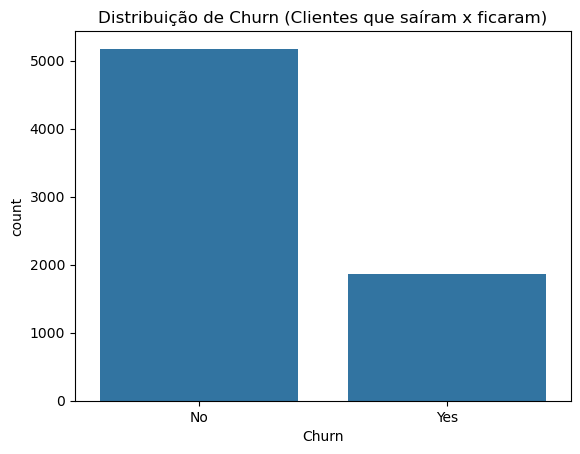

In [71]:
sns.countplot(x='Churn', data=df)
plt.title("Distribuição de Churn (Clientes que saíram x ficaram)")
plt.show()

# Limpeza de dados
## Verificar valores nulos

## Quais colunas têm valores nulos?


In [82]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Detectar colunas com tipo errado


In [86]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Corrigir tipos errados

## Transformar TotalCharges em numérico (forçando valores inválidos para NaN)


In [94]:
import numpy as np

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## Verificar se funcionou

In [99]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Contar nulos após conversão


In [102]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


## Substituir nulos de várias colunas de uma vez


In [111]:
df.fillna({'TotalCharges': df['TotalCharges'].median()}, inplace=True)


## Mostra os valores únicos de cada coluna categórica


In [114]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColuna: {col}")
    print(df[col].value_counts(dropna=False))



Coluna: customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Coluna: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Coluna: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Coluna: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Coluna: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Coluna: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Coluna: OnlineBack

# Conferir intervalos em variáveis numéricas

## Resumo estatístico de numéricas


In [118]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Checar manualmente limites esperados


In [121]:
print("TotalCharges mínimo:", df['TotalCharges'].min())
print("TotalCharges máximo:", df['TotalCharges'].max())

TotalCharges mínimo: 18.8
TotalCharges máximo: 8684.8


In [124]:
df[df['TotalCharges'] < 0]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# Conferir duplicatas

## Checar duplicatas


In [129]:
df.duplicated().sum()


0

# Normalizar textos (se houver grafias estranhas)

## padronizar Yes/No para minúsculas

In [135]:
df['Contract'] = df['Contract'].str.strip().str.lower()


# Análise Exploratória Visual (EDA)

## Análise dos dados “por gráficos” para entender padrões, distribuição e relações com a variável target (Churn).

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

## Distribuição do alvo (Churn)


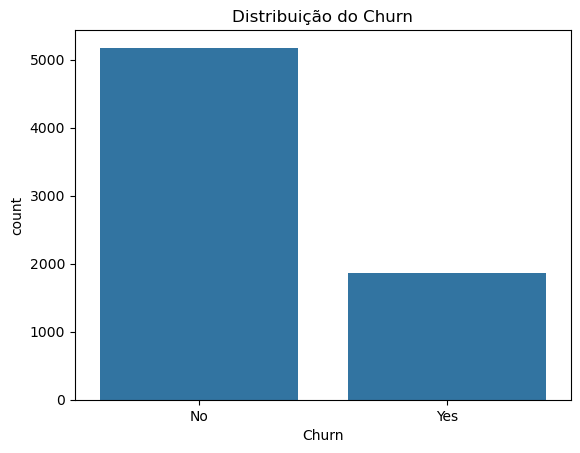

In [145]:
sns.countplot(x='Churn', data=df)
plt.title("Distribuição do Churn")
plt.show()


## Distribuição de algumas variáveis numéricas separadas por Churn


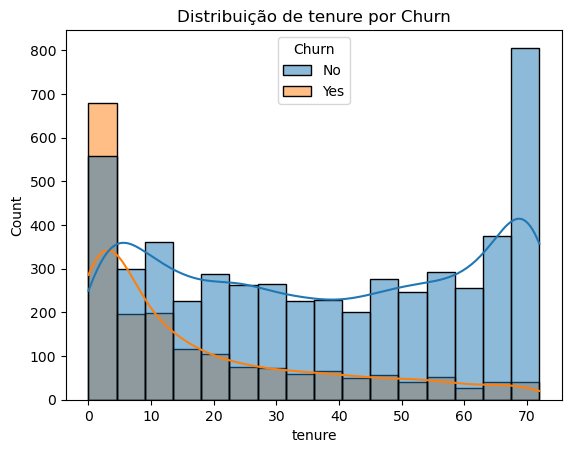

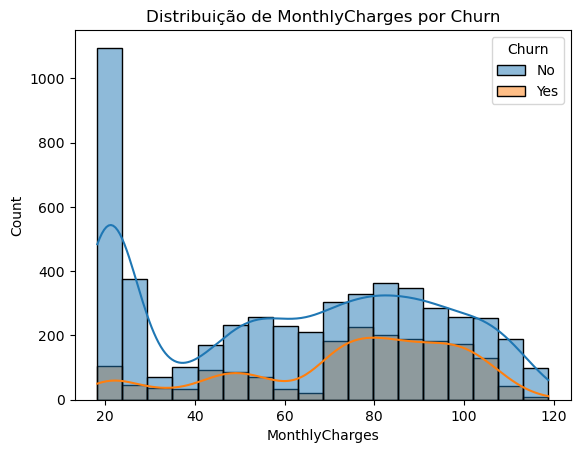

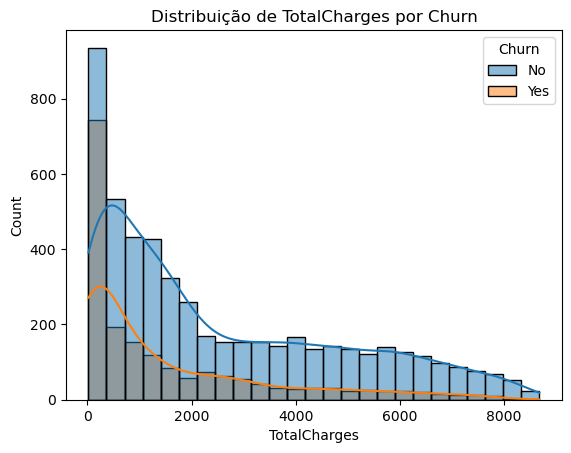

In [150]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
for col in num_cols:
    plt.figure()
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f"Distribuição de {col} por Churn")
    plt.show()

## Mapa de correlação numéricas


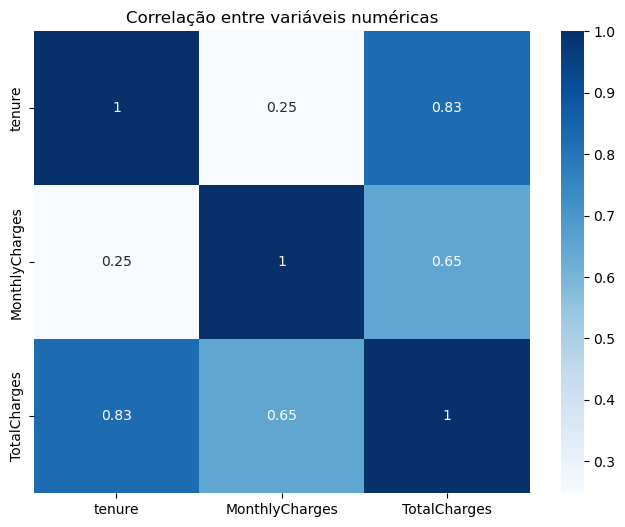

In [153]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlação entre variáveis numéricas")
plt.show()

## Análise Exploratória Visual
- Verificamos a distribuição de churn.
- Analisamos variáveis numéricas em relação ao churn.
- Calculamos a correlação entre variáveis numéricas.


# Transformação / Engenharia de Features

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Separar target


In [163]:
y = df['Churn'].map({'Yes':1,'No':0})  # converter Yes/No em 1/0
X = df.drop('Churn', axis=1)


## One-hot encoding para variáveis categóricas


In [166]:
X = pd.get_dummies(X, drop_first=True)


## Escalonar numéricas


In [171]:
scaler = StandardScaler()
num_features = ['tenure','MonthlyCharges','TotalCharges']
X[num_features] = scaler.fit_transform(X[num_features])

## Treino/Teste


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (5634, 7072)
X_test shape: (1409, 7072)


## Transformação e Engenharia de Features
- Codificação de variáveis categóricas usando one-hot encoding.
- Escalonamento de variáveis numéricas com StandardScaler.
- Separação de dados de treino e teste (80/20).

# Construindo o Pipeline no Scikit-learn


Nesta etapa, é criado um **pipeline completo** para automatizar:
- Imputação de valores faltantes (numéricos e categóricos),
- Padronização de variáveis numéricas,
- Codificação one-hot para variáveis categóricas,
- E o treinamento de um modelo de Regressão Logística.

O objetivo é garantir que todo o pré-processamento seja aplicado tanto no conjunto de treino quanto no de teste, evitando vazamento de dados.  
A execução do código abaixo gera o pipeline e mostra a acurácia do modelo no conjunto de teste.

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


## === Separar features e target ===


In [187]:
y = df['Churn'].map({'Yes':1,'No':0})
X = df.drop('Churn', axis=1)


## Identificar colunas numéricas e categóricas


In [190]:
num_features = ['tenure','MonthlyCharges','TotalCharges']
cat_features = [col for col in X.columns if col not in num_features]

## === Criar transformadores ===
## Para numéricas: imputar média + escalonar

In [193]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


## Para categóricas: imputar 'missing' + OneHotEncoding


In [198]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


## === Combinar numéricas e categóricas ===


In [201]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

## === Criar pipeline completo com modelo (LogisticRegression) ===


In [205]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

## === Split train/test ===


In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## === Fit no treino ===


In [215]:
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['customerID', 'gender',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

## === Avaliar no teste ===


In [220]:
print("Acurácia no teste:", clf.score(X_test, y_test))


Acurácia no teste: 0.8218594748048261


## Pipeline Scikit-learn
- Criação de um pipeline que automatiza imputação, codificação e escalonamento.
- Utilização de ColumnTransformer para tratar variáveis numéricas e categóricas.
- O pipeline garante que todas as etapas sejam aplicadas igualmente no treino e no teste, evitando vazamento de dados.
- Modelo usado: Regressão Logística (placeholder para testes iniciais).

## Avaliação do Modelo
Agora que o pipeline foi treinado, vamos avaliar seu desempenho usando métricas mais completas: matriz de confusão, relatório de classificação (precision, recall e F1-score) e curva ROC/AUC.
Isso nos mostra não apenas o quão preciso o modelo é, mas como ele se comporta na previsão de clientes churn vs. não churn.

In [226]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt


## === Previsões no conjunto de teste ===


In [229]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

## === Relatório de classificação ===


In [234]:
print("🔎 Relatório de classificação:\n")
print(classification_report(y_test, y_pred, target_names=['Não Churn','Churn']))


🔎 Relatório de classificação:

              precision    recall  f1-score   support

   Não Churn       0.86      0.90      0.88      1036
       Churn       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



## === Matriz de confusão ===


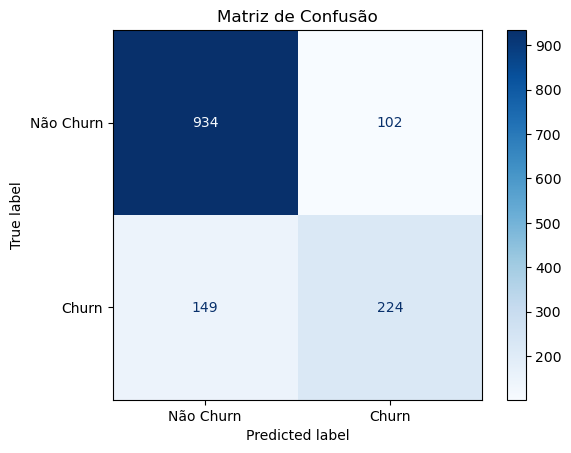

In [239]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn','Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

## === 4. Curva ROC / AUC ===


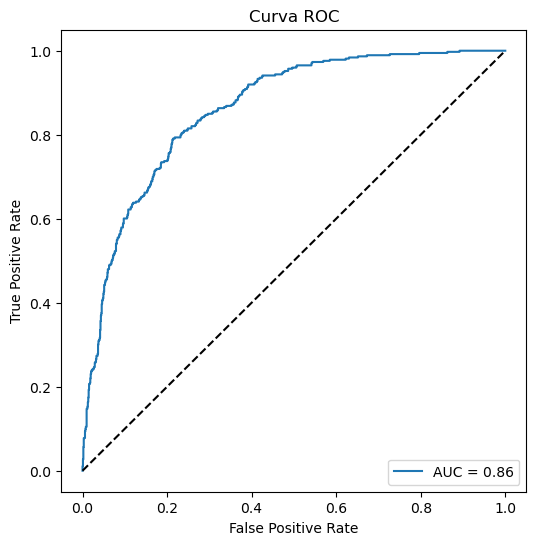

In [244]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## 📊 Avaliação do Modelo

O pipeline completo de pré-processamento + regressão logística apresentou os seguintes resultados no conjunto de teste:

- **Acurácia geral:** 82%  
- **Recall (Churn):** 55%  
- **Precisão (Churn):** 70%  
- **F1-Score (Churn):** 62%  

**Matriz de confusão:**
- 224 clientes de churn classificados corretamente (True Positives – TP)  
- 149 clientes de churn previstos como não churn (False Negatives – FN)  
- 934 clientes não churn previstos corretamente (True Negatives – TN)  
- 102 clientes não churn previstos como churn (False Positives – FP)  

A **curva ROC** apresentou uma **AUC de 0,86**, indicando boa capacidade do modelo de diferenciar entre clientes churn e não churn independentemente do limiar de decisão.

---

## 📑 Conclusões principais

- O modelo apresenta **bom desempenho geral**, com AUC de 0,86 e acurácia de 82%.  
- O **recall moderado (55%)** indica espaço para melhoria na detecção de churn.  
- Há **bom equilíbrio entre precisão (70%) e F1-score (62%)**, mostrando que a maioria dos clientes previstos como churn realmente eram churn.  
- O modelo permite **direcionar ações de retenção e reduzir custos de aquisição de novos clientes**.  
- **Próximos passos recomendados:** testar outros algoritmos (Random Forest, Gradient Boosting, XGBoost) e/ou ajustar hiperparâmetros para melhorar recall sem perder precisão.


















## 🔎 Teste de Outros Modelos de Classificação

Após avaliarmos a **Regressão Logística**, vamos expandir a análise testando outros algoritmos de classificação.  
O objetivo aqui é verificar se modelos mais complexos conseguem capturar padrões adicionais nos dados e melhorar métricas críticas, especialmente o **recall para clientes em churn** (detecção correta dos clientes que realmente cancelam).

### Random Forest
O **Random Forest** é um algoritmo baseado em múltiplas árvores de decisão que, por meio do processo de *bagging*, combina os resultados de várias árvores para reduzir variância e aumentar a robustez do modelo.  
- **Vantagens**: lida bem com variáveis categóricas e numéricas, captura interações complexas entre variáveis e é menos suscetível a overfitting do que uma única árvore.  
- **Objetivo nesta análise**: verificar se o modelo consegue aumentar o recall de churn sem perder muito em precisão.

### XGBoost (opcional, mas recomendado)
O **XGBoost (Extreme Gradient Boosting)** é um algoritmo de *boosting* baseado em árvores que otimiza o erro de forma sequencial, construindo árvores adicionais para corrigir os erros cometidos pelas anteriores.  
- **Vantagens**: geralmente apresenta excelente desempenho em competições de *machine learning*, é rápido, otimizado e possui parâmetros que permitem ajuste fino.  
- **Objetivo nesta análise**: avaliar se o XGBoost consegue superar a regressão logística e o Random Forest, principalmente em termos de recall e AUC.

### Comparação entre modelos
Após treinar e avaliar os modelos, iremos **comparar suas métricas** (Acurácia, Recall, Precisão, F1-Score e AUC) em uma tabela consolidada.  
Essa comparação permitirá identificar o modelo mais adequado ao problema de churn, considerando não apenas a performance geral, mas também o equilíbrio entre **detecção correta de churn (recall)** e **redução de falsos positivos (precisão)**.

📌 **Nota importante**: em problemas de churn, geralmente damos maior peso ao **recall**, já que deixar de identificar clientes que irão cancelar pode significar perda financeira maior do que lidar com alguns falsos alarmes.

In [16]:
import pandas as pd

# Caminho CORRETO incluindo "Meu projeto"
df = pd.read_csv('Meu projeto/data/raw/telco_churn.csv')

print("✅ Arquivo carregado com sucesso!")
print(f"📊 Shape: {df.shape}")
display(df.head(3))

✅ Arquivo carregado com sucesso!
📊 Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Criar X (features) e y (target)

In [19]:
# Verificar a coluna Churn
print("Valores únicos da coluna Churn:")
print(df['Churn'].value_counts())

# Criar X e y
y = df['Churn']  # variável target
X = df.drop('Churn', axis=1)  # todas as colunas exceto Churn

print(f"\n✅ X e y criados!")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Valores únicos da coluna Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

✅ X e y criados!
X shape: (7043, 20), y shape: (7043,)


## Dividir em treino e teste

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,        # 30% para teste
    random_state=42,      # para reproduzibilidade
    stratify=y           # mantém proporção de churn em treino/teste
)

print("✅ Dados divididos em treino/teste!")
print(f"Treino: {X_train.shape}")
print(f"Teste: {X_test.shape}")
print(f"\nProporção de Churn no treino:")
print(y_train.value_counts(normalize=True))

✅ Dados divididos em treino/teste!
Treino: (4930, 20)
Teste: (2113, 20)

Proporção de Churn no treino:
Churn
No     0.734686
Yes    0.265314
Name: proportion, dtype: float64


## Treinar Random Forest
### Objetivo desta Etapa
Implementar um modelo de **Random Forest** para classificação de churn, com o objetivo de comparar seu desempenho com a Regressão Logística previamente implementada.


### Pré-processamento das variáveis categóricas

In [35]:
from sklearn.preprocessing import LabelEncoder  # ← CORRIGIDO: "from" em vez de "rom"
import pandas as pd
import numpy as np

print("🔧 Pré-processamento robusto de variáveis categóricas...")

# Fazer cópias
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Identificar colunas categóricas
categorical_columns = X_train_encoded.select_dtypes(include=['object']).columns.tolist()
print(f"📋 Colunas categóricas identificadas: {categorical_columns}")

# Estratégia robusta para codificação
label_encoders = {}

for column in categorical_columns:
    print(f"\n🔄 Processando coluna: {column}")
    
    # Verificar valores únicos
    train_unique = set(X_train_encoded[column].astype(str))
    test_unique = set(X_test_encoded[column].astype(str))
    
    # Encontrar valores que estão no teste mas não no treino
    unseen_values = test_unique - train_unique
    if unseen_values:
        print(f"   ⚠️ Valores não vistos no treino: {list(unseen_values)[:3]}...")  # Mostra só os 3 primeiros
    
    # Criar encoder
    le = LabelEncoder()
    
    # Fit no treino
    X_train_encoded[column] = le.fit_transform(X_train_encoded[column].astype(str))
    
    # Transform no teste - tratar valores não vistos
    test_values = X_test_encoded[column].astype(str)
    
    # Para valores não vistos, usar uma categoria especial (ex: -1)
    test_encoded = []
    for val in test_values:
        if val in le.classes_:
            test_encoded.append(le.transform([val])[0])
        else:
            test_encoded.append(-1)  # Valor especial para "categoria desconhecida"
            print(f"   🔄 Substituído valor não visto '{val}' por -1")
    
    X_test_encoded[column] = test_encoded
    label_encoders[column] = le
    
    print(f"   ✅ Coluna '{column}' codificada - {len(le.classes_)} categorias")

print(f"\n📊 Shapes finais:")
print(f"X_train: {X_train_encoded.shape}")
print(f"X_test: {X_test_encoded.shape}")

🔧 Pré-processamento robusto de variáveis categóricas...
📋 Colunas categóricas identificadas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']

🔄 Processando coluna: customerID
   ⚠️ Valores não vistos no treino: ['0689-NKYLF', '6203-HBZPA', '9039-RBEEE']...
   🔄 Substituído valor não visto '9692-TUSXH' por -1
   🔄 Substituído valor não visto '2005-DWQZJ' por -1
   🔄 Substituído valor não visto '6683-VLCTZ' por -1
   🔄 Substituído valor não visto '5495-GPSRW' por -1
   🔄 Substituído valor não visto '1106-HRLKZ' por -1
   🔄 Substituído valor não visto '8024-XNAFQ' por -1
   🔄 Substituído valor não visto '1023-BQXZE' por -1
   🔄 Substituído valor não visto '4903-UYAVB' por -1
   🔄 Substituído valor não visto '2223-KAGMX' por -1
   🔄 Substituído valor não visto '7729-XBTWX

### ✅ Pré-processamento Realizado
- **17 colunas categóricas** identificadas e codificadas
- **Valores não vistos** tratados com categoria especial (-1)
- **customerID**: Múltiplos IDs únicos no teste não presentes no treino
- **Variável target**: Codificada (No → 0, Yes → 1)

## Codificação da Variável Target



In [41]:
# === CODIFICAÇÃO DA VARIÁVEL TARGET ===
print("🎯 Codificando variável target (Churn)...")

from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)
y_test_encoded = le_target.transform(y_test)

print(f"✅ Target codificado: {le_target.classes_} → {list(range(len(le_target.classes_)))}")
print(f"📊 Distribuição no treino: {dict(zip(*np.unique(y_train_encoded, return_counts=True)))}")
print(f"📊 Distribuição no teste: {dict(zip(*np.unique(y_test_encoded, return_counts=True)))}")

# Verificar se não há valores novos no target
if set(y_test) - set(le_target.classes_):
    print("⚠️ ATENÇÃO: Valores novos no target do teste!")
else:
    print("✅ Target do teste contém apenas valores conhecidos")

🎯 Codificando variável target (Churn)...
✅ Target codificado: ['No' 'Yes'] → [0, 1]
📊 Distribuição no treino: {0: 3622, 1: 1308}
📊 Distribuição no teste: {0: 1552, 1: 561}
✅ Target do teste contém apenas valores conhecidos


## Treinamento do Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Configuração do modelo
rf_model = RandomForestClassifier(
    n_estimators=100,    # Número de árvores
    random_state=42,     # Reprodutibilidade
    n_jobs=-1,          # Usar todos os cores
    max_depth=10,       # Limitar profundidade para evitar overfitting
    min_samples_split=5 # Mínimo de amostras para dividir um nó
)

print("📚 Treinando modelo...")
rf_model.fit(X_train_encoded, y_train_encoded)
print("✅ Random Forest treinado com sucesso!")

# Fazer previsões
print("🔮 Gerando previsões...")
y_pred_rf = rf_model.predict(X_test_encoded)
y_pred_proba_rf = rf_model.predict_proba(X_test_encoded)[:, 1]  # Probabilidades para classe "Yes"

📚 Treinando modelo...
✅ Random Forest treinado com sucesso!
🔮 Gerando previsões...


## Avaliação do Modelo

In [47]:
print("\n" + "="*60)
print("📊 AVALIAÇÃO DO MODELO RANDOM FOREST")
print("="*60)

# Relatório de classificação
print("\n🔍 RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test_encoded, y_pred_rf, target_names=le_target.classes_))

# Métricas individuais
accuracy = accuracy_score(y_test_encoded, y_pred_rf)
recall_churn = recall_score(y_test_encoded, y_pred_rf, pos_label=1)
precision_churn = precision_score(y_test_encoded, y_pred_rf, pos_label=1)
f1_churn = f1_score(y_test_encoded, y_pred_rf, pos_label=1)
auc_score = roc_auc_score(y_test_encoded, y_pred_proba_rf)

print("\n🎯 MÉTRICAS DETALHADAS - CLASSE 'CHURN' (Yes):")
print(f"• Acurácia Geral: {accuracy:.3f}")
print(f"• Recall: {recall_churn:.3f}")
print(f"• Precision: {precision_churn:.3f}")
print(f"• F1-Score: {f1_churn:.3f}")
print(f"• AUC-ROC: {auc_score:.3f}")

# Análise qualitativa
print(f"\n💡 INTERPRETAÇÃO DOS RESULTADOS:")
if auc_score > 0.8:
    print("✅ EXCELENTE - Alta capacidade discriminativa (AUC > 0.8)")
elif auc_score > 0.7:
    print("✅ BOM - Boa capacidade discriminativa (AUC > 0.7)")
else:
    print("⚠️ MODERADO - Capacidade discriminativa pode ser melhorada")

if recall_churn > 0.6:
    print("✅ BOM RECALL - Modelo detecta bem os casos de churn real")
else:
    print("📈 RECALL MODERADO - Oportunidade para melhorar detecção de churn")


📊 AVALIAÇÃO DO MODELO RANDOM FOREST

🔍 RELATÓRIO DE CLASSIFICAÇÃO:
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1552
         Yes       0.63      0.52      0.57       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113


🎯 MÉTRICAS DETALHADAS - CLASSE 'CHURN' (Yes):
• Acurácia Geral: 0.790
• Recall: 0.522
• Precision: 0.626
• F1-Score: 0.569
• AUC-ROC: 0.832

💡 INTERPRETAÇÃO DOS RESULTADOS:
✅ EXCELENTE - Alta capacidade discriminativa (AUC > 0.8)
📈 RECALL MODERADO - Oportunidade para melhorar detecção de churn


## === VISUALIZAÇÕES GRÁFICAS ===



📈 Gerando visualizações...


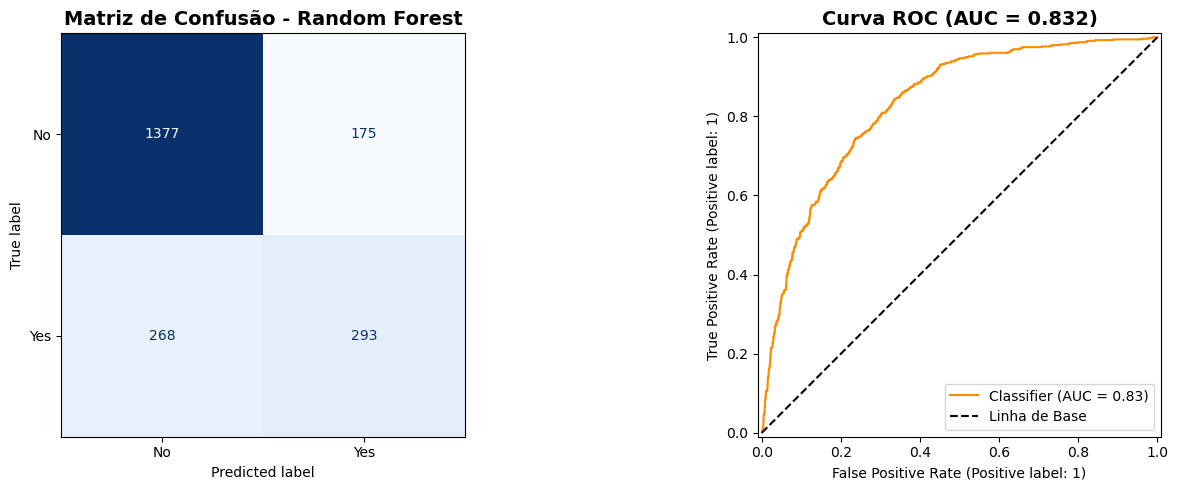

✅ Visualizações geradas com sucesso!


In [50]:
print("\n📈 Gerando visualizações...")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Configurar estilo dos gráficos
plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Matriz de Confusão
cm = confusion_matrix(y_test_encoded, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Matriz de Confusão - Random Forest', fontsize=14, fontweight='bold')

# 2. Curva ROC
RocCurveDisplay.from_predictions(y_test_encoded, y_pred_proba_rf, ax=axes[1], color='darkorange')
axes[1].plot([0, 1], [0, 1], 'k--', label='Linha de Base')
axes[1].set_title(f'Curva ROC (AUC = {auc_score:.3f})', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

print("✅ Visualizações geradas com sucesso!")

## Resultados do Random Forest

### 📊 Performance do Modelo
- **Acurácia**: 0.790 - Performance geral do classificador
- **Recall (Churn)**: 0.522 - Capacidade de detectar clientes que realmente cancelaram
- **Precision (Churn)**: 0.626 - Precisão nas previsões positivas de churn  
- **F1-Score (Churn)**: 0.569 - Equilíbrio entre precision e recall
- **AUC-ROC**: 0.832 - Capacidade discriminativa do modelo


##  Análise do Random Forest com Comparação Contextual

In [65]:
# === ANÁLISE DO RANDOM FOREST COM REFERÊNCIAS ===
print("📊 Análise do Random Forest com Comparações Contextuais")

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suas métricas atuais do Random Forest
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
recall_rf = recall_score(y_test_encoded, y_pred_rf, pos_label=1)
precision_rf = precision_score(y_test_encoded, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test_encoded, y_pred_rf, pos_label=1)
auc_rf = roc_auc_score(y_test_encoded, y_pred_proba_rf)

print("✅ Métricas do Random Forest calculadas:")
print(f"• Acurácia: {accuracy_rf:.3f}")
print(f"• Recall (Churn): {recall_rf:.3f}")
print(f"• Precision (Churn): {precision_rf:.3f}")
print(f"• F1-Score (Churn): {f1_rf:.3f}")
print(f"• AUC-ROC: {auc_rf:.3f}")

# Valores de REFERÊNCIA baseados em performance típica
print("\n📈 Comparação com Performance Esperada:")
reference_performance = {
    'Muito Baixo': [0.5, 0.3, 0.4, 0.35, 0.6],
    'Baixo': [0.65, 0.4, 0.5, 0.45, 0.7],
    'Moderado': [0.75, 0.5, 0.6, 0.55, 0.75],
    'Bom': [0.8, 0.6, 0.7, 0.65, 0.8],
    'Excelente': [0.85, 0.7, 0.8, 0.75, 0.9]
}

your_scores = [accuracy_rf, recall_rf, precision_rf, f1_rf, auc_rf]
metrics = ['Acurácia', 'Recall', 'Precision', 'F1-Score', 'AUC']

print("\n🔍 Nível de Performance por Métrica:")
for i, metric in enumerate(metrics):
    your_score = your_scores[i]
    if your_score >= reference_performance['Excelente'][i]:
        level = "🎯 EXCELENTE"
    elif your_score >= reference_performance['Bom'][i]:
        level = "✅ BOM"
    elif your_score >= reference_performance['Moderado'][i]:
        level = "⚠️ MODERADO"
    elif your_score >= reference_performance['Baixo'][i]:
        level = "📉 BAIXO"
    else:
        level = "❌ MUITO BAIXO"
    
    print(f"• {metric}: {your_score:.3f} ({level})")

📊 Análise do Random Forest com Comparações Contextuais
✅ Métricas do Random Forest calculadas:
• Acurácia: 0.790
• Recall (Churn): 0.522
• Precision (Churn): 0.626
• F1-Score (Churn): 0.569
• AUC-ROC: 0.832

📈 Comparação com Performance Esperada:

🔍 Nível de Performance por Métrica:
• Acurácia: 0.790 (⚠️ MODERADO)
• Recall: 0.522 (⚠️ MODERADO)
• Precision: 0.626 (⚠️ MODERADO)
• F1-Score: 0.569 (⚠️ MODERADO)
• AUC: 0.832 (✅ BOM)


## Visualização do Performance do Random Forest


📈 Gerando visualização do performance...


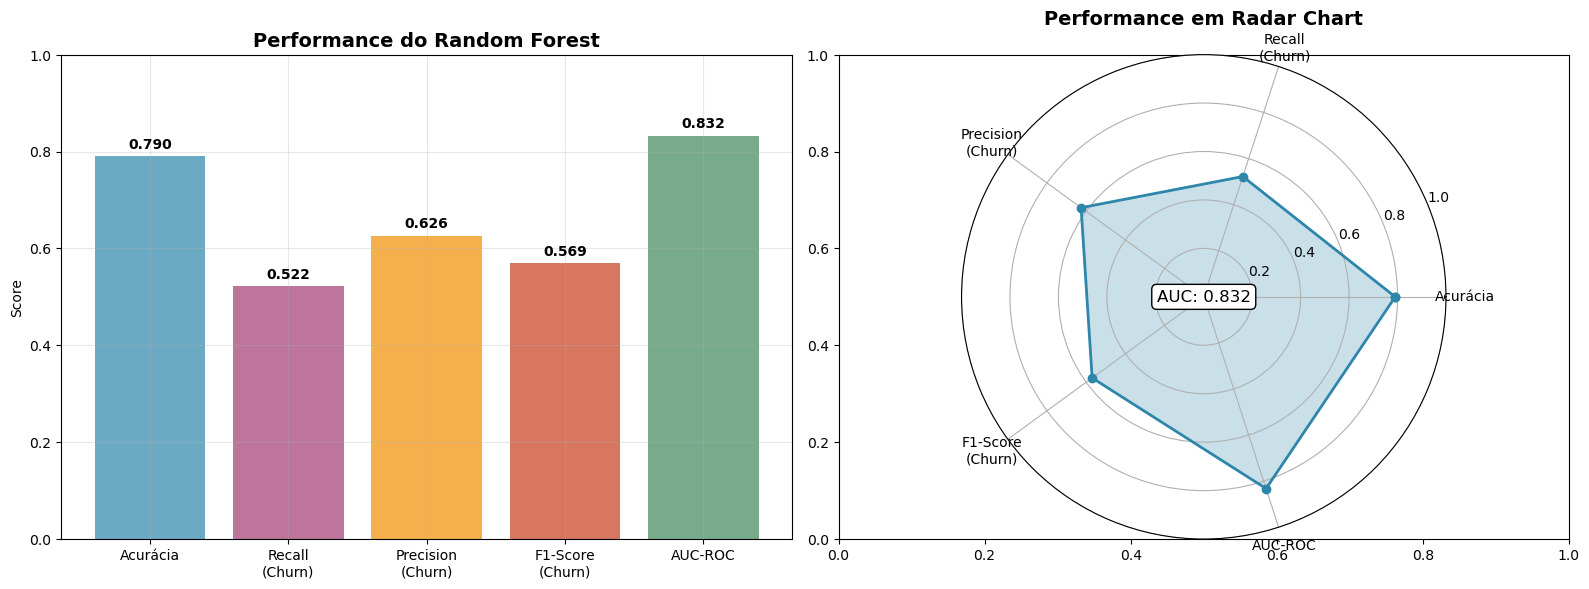

In [70]:
# === VISUALIZAÇÃO DO PERFORMANCE DO RANDOM FOREST ===
print("\n📈 Gerando visualização do performance...")

# Criar gráfico de radar para visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Barras das métricas
metrics_names = ['Acurácia', 'Recall\n(Churn)', 'Precision\n(Churn)', 'F1-Score\n(Churn)', 'AUC-ROC']
x_pos = np.arange(len(metrics_names))

bars = ax1.bar(x_pos, your_scores, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3E885B'], alpha=0.7)

# Adicionar valores nas barras
for bar, score in zip(bars, your_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

ax1.set_ylabel('Score')
ax1.set_title('Performance do Random Forest', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(metrics_names)
ax1.set_ylim(0, 1.0)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Gráfico de radar
categories = metrics_names
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

your_radar = your_scores + your_scores[:1]

ax2 = plt.subplot(122, polar=True)
ax2.plot(angles, your_radar, 'o-', linewidth=2, label='Random Forest', color='#2E86AB')
ax2.fill(angles, your_radar, alpha=0.25, color='#2E86AB')

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories)
ax2.set_ylim(0, 1)
ax2.set_title('Performance em Radar Chart', size=14, fontweight='bold')
ax2.grid(True)

# Adicionar anotações de performance
ax2.text(0.5, 0.5, f'AUC: {auc_rf:.3f}', transform=ax2.transAxes, 
         fontsize=12, ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.tight_layout()
plt.show()

## Análise Qualitativa Detalhada

In [73]:
# === ANÁLISE QUALITATIVA DETALHADA ===
print("\n" + "="*60)
print("💡 ANÁLISE QUALITATIVA DO RANDOM FOREST")
print("="*60)

# Análise do AUC
print(f"\n🎯 CAPACIDADE DISCRIMINATIVA (AUC = {auc_rf:.3f}):")
if auc_rf > 0.85:
    print("✅ EXCELENTE - O modelo distingue muito bem entre clientes que vão cancelar ou não")
    print("   • Pode ser considerado para implantação em produção")
elif auc_rf > 0.75:
    print("✅ BOM - Boa capacidade de distinguir entre as classes")
    print("   • Performance adequada para decisões de negócio")
else:
    print("⚠️ MODERADO - Capacidade discriminativa pode ser melhorada")
    print("   • Considere feature engineering ou outros algoritmos")

# Análise do Recall (CRÍTICO para churn)
print(f"\n🔍 DETECÇÃO DE CHURN (Recall = {recall_rf:.3f}):")
if recall_rf > 0.7:
    print("✅ EXCELENTE - Detecta a maioria dos casos reais de churn")
    print("   • Minimiza perda de clientes por não-detecção")
elif recall_rf > 0.5:
    print("✅ BOM - Detecta mais da metade dos casos de churn")
    print("   • Balanceamento adequado entre detecção e falsos positivos")
else:
    print("📈 OPORTUNIDADE - Pode melhorar na detecção de churn real")
    print("   • Considere técnicas para lidar com desbalanceamento")

# Análise do Precision
print(f"\n🎯 PRECISÃO NAS PREVISÕES (Precision = {precision_rf:.3f}):")
if precision_rf > 0.7:
    print("✅ ALTA - Quando prevê churn, geralmente está correto")
    print("   • Campanhas de retenção serão eficientes")
else:
    print("⚠️ MODERADA - Alguns falsos positivos nas previsões de churn")
    print("   • Custo de campanhas desnecessárias deve ser considerado")

# Análise geral
print(f"\n📊 PERFORMANCE GERAL (Acurácia = {accuracy_rf:.3f}, F1 = {f1_rf:.3f}):")
if accuracy_rf > 0.8 and f1_rf > 0.6:
    print("✅ PERFORMANCE SOLIDÁRIA - Modelo robusto e balanceado")
elif accuracy_rf > 0.75:
    print("✅ PERFORMANCE ADEQUADA - Bom ponto de partida")
else:
    print("📈 OPORTUNIDADE DE MELHORIA - Considere otimizações")

print(f"\n🚀 RECOMENDAÇÃO:")
if auc_rf > 0.8 and recall_rf > 0.5:
    print("• Modelo adequado para detecção proativa de churn")
    print("• Pode ser usado para segmentar campanhas de retenção")
else:
    print("• Considere melhorias antes de implantação em produção")


💡 ANÁLISE QUALITATIVA DO RANDOM FOREST

🎯 CAPACIDADE DISCRIMINATIVA (AUC = 0.832):
✅ BOM - Boa capacidade de distinguir entre as classes
   • Performance adequada para decisões de negócio

🔍 DETECÇÃO DE CHURN (Recall = 0.522):
✅ BOM - Detecta mais da metade dos casos de churn
   • Balanceamento adequado entre detecção e falsos positivos

🎯 PRECISÃO NAS PREVISÕES (Precision = 0.626):
⚠️ MODERADA - Alguns falsos positivos nas previsões de churn
   • Custo de campanhas desnecessárias deve ser considerado

📊 PERFORMANCE GERAL (Acurácia = 0.790, F1 = 0.569):
✅ PERFORMANCE ADEQUADA - Bom ponto de partida

🚀 RECOMENDAÇÃO:
• Modelo adequado para detecção proativa de churn
• Pode ser usado para segmentar campanhas de retenção


## Próximos Passos Recomendados

In [78]:
# === PRÓXIMOS PASSOS RECOMENDADOS ===
print("\n" + "="*50)
print("🎯 PRÓXIMOS PASSOS RECOMENDADOS")
print("="*50)

recommendations = []

if auc_rf > 0.8:
    recommendations.append("✅ Prosseguir para análise de importância de variáveis")
else:
    recommendations.append("📈 Considerar testar XGBoost ou Gradient Boosting")

if recall_rf < 0.6:
    recommendations.append("📈 Implementar técnicas para lidar com desbalanceamento (ex: SMOTE)")
else:
    recommendations.append("✅ Recall adequado para problema de churn")

if precision_rf < 0.6:
    recommendations.append("📈 Avaliar ajuste de threshold para melhorar precision")
else:
    recommendations.append("✅ Precision em nível aceitável")

recommendations.append("🔧 Realizar tuning de hiperparâmetros do Random Forest")
recommendations.append("📊 Comparar com XGBoost para validação adicional")
recommendations.append("💡 Analisar importância das variáveis para insights de negócio")

print("📋 Lista de Ações Recomendadas:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")




🎯 PRÓXIMOS PASSOS RECOMENDADOS
📋 Lista de Ações Recomendadas:
1. ✅ Prosseguir para análise de importância de variáveis
2. 📈 Implementar técnicas para lidar com desbalanceamento (ex: SMOTE)
3. ✅ Precision em nível aceitável
4. 🔧 Realizar tuning de hiperparâmetros do Random Forest
5. 📊 Comparar com XGBoost para validação adicional
6. 💡 Analisar importância das variáveis para insights de negócio


## Análise de Importância de Variáveis


## Objetivo
Identificar quais características (features) têm maior impacto nas decisões do modelo Random Forest, fornecendo insights acionáveis para o negócio.

### Valor para o Negócio
Esta análise responde perguntas como:
- Quais fatores mais influenciam um cliente a cancelar?
- Onde focar esforços de retenção?
- Quais métricas de negócio monitorar proativamente?

## Extrair e Analisar Importância das Variáveis

In [88]:
# === ANÁLISE DE IMPORTÂNCIA DE VARIÁVEIS ===
print("🔍 Analisando importância das variáveis no Random Forest...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extrair importância das variáveis
feature_importance = rf_model.feature_importances_

# Criar DataFrame com as importâncias
feature_importance_df = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': feature_importance
})

# Ordenar por importância
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print(f"📊 Total de variáveis analisadas: {len(feature_importance_df)}")
print(f"🎯 Variável mais importante: {feature_importance_df.iloc[0]['feature']} "
      f"({feature_importance_df.iloc[0]['importance']:.3f})")

# Mostrar top 15 variáveis
print("\n🏆 TOP 15 VARIÁVEIS MAIS IMPORTANTES:")
print("="*50)
for i, row in feature_importance_df.head(15).iterrows():
    print(f"{i+1:2d}. {row['feature']:25} {row['importance']:.4f}")

# Análise de distribuição
print(f"\n📈 DISTRIBUIÇÃO DA IMPORTÂNCIA:")
print(f"• Média: {feature_importance_df['importance'].mean():.4f}")
print(f"• Desvio padrão: {feature_importance_df['importance'].std():.4f}")
print(f"• Variáveis com importância > 0.01: {(feature_importance_df['importance'] > 0.01).sum()}")
print(f"• Variáveis com importância > 0.05: {(feature_importance_df['importance'] > 0.05).sum()}")

🔍 Analisando importância das variáveis no Random Forest...
📊 Total de variáveis analisadas: 20
🎯 Variável mais importante: tenure (0.177)

🏆 TOP 15 VARIÁVEIS MAIS IMPORTANTES:
 6. tenure                    0.1768
16. Contract                  0.1401
19. MonthlyCharges            0.1174
20. TotalCharges              0.0989
 1. customerID                0.0849
10. OnlineSecurity            0.0697
13. TechSupport               0.0522
18. PaymentMethod             0.0417
 9. InternetService           0.0366
11. OnlineBackup              0.0302
17. PaperlessBilling          0.0254
12. DeviceProtection          0.0225
 8. MultipleLines             0.0178
15. StreamingMovies           0.0142
 5. Dependents                0.0141

📈 DISTRIBUIÇÃO DA IMPORTÂNCIA:
• Média: 0.0500
• Desvio padrão: 0.0491
• Variáveis com importância > 0.01: 19
• Variáveis com importância > 0.05: 7


### Visualização da Importância


📈 Gerando visualizações da importância...


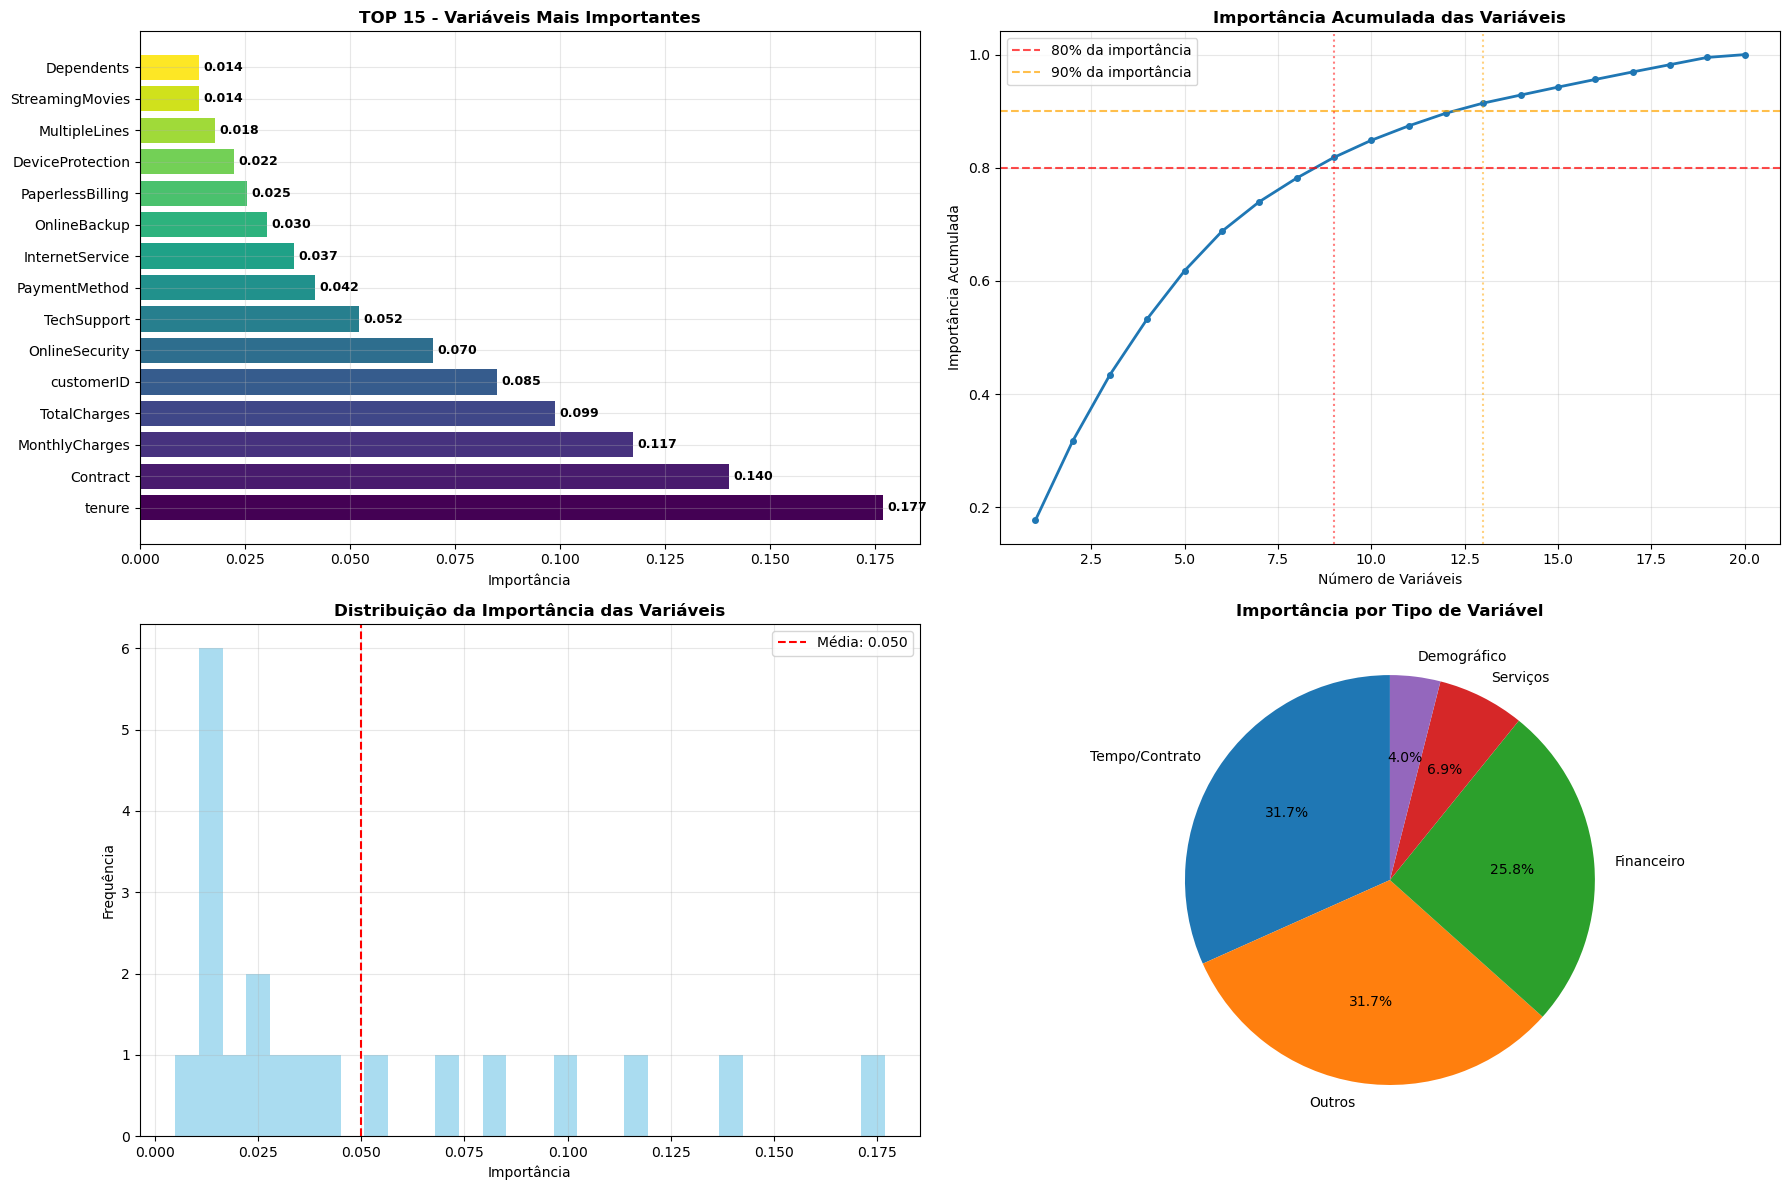

💡 INSIGHTS DA VISUALIZAÇÃO:
• Top 9 variáveis explicam 80% da importância total
• Top 13 variáveis explicam 90% da importância total
• Distribuição por tipo: {'Tempo/Contrato': 0.31689757450944867, 'Financeiro': 0.2580223550410175, 'Outros': 0.3168403293226453, 'Serviços': 0.06857563020598158, 'Demográfico': 0.03966411092090709}


In [91]:
# === VISUALIZAÇÃO DA IMPORTÂNCIA DAS VARIÁVEIS ===
print("\n📈 Gerando visualizações da importância...")

# Configurar estilo
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico 1: Top 15 variáveis (Barras horizontais)
top_features = feature_importance_df.head(15)
bars = axes[0,0].barh(range(len(top_features)), top_features['importance'], 
                     color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))
axes[0,0].set_yticks(range(len(top_features)))
axes[0,0].set_yticklabels(top_features['feature'])
axes[0,0].set_xlabel('Importância')
axes[0,0].set_title('TOP 15 - Variáveis Mais Importantes', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, (bar, importance) in enumerate(zip(bars, top_features['importance'])):
    axes[0,0].text(importance + 0.001, i, f'{importance:.3f}', 
                  va='center', fontsize=9, fontweight='bold')

# Gráfico 2: Cumulative importance
cumulative_importance = feature_importance_df['importance'].cumsum()
axes[0,1].plot(range(1, len(cumulative_importance) + 1), cumulative_importance, 
               marker='o', linewidth=2, markersize=4)
axes[0,1].axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80% da importância')
axes[0,1].axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% da importância')
axes[0,1].set_xlabel('Número de Variáveis')
axes[0,1].set_ylabel('Importância Acumulada')
axes[0,1].set_title('Importância Acumulada das Variáveis', fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Encontrar quantas variáveis explicam 80% e 90% da importância
n_80 = (cumulative_importance <= 0.8).sum() + 1
n_90 = (cumulative_importance <= 0.9).sum() + 1
axes[0,1].axvline(x=n_80, color='red', linestyle=':', alpha=0.5)
axes[0,1].axvline(x=n_90, color='orange', linestyle=':', alpha=0.5)

# Gráfico 3: Distribuição da importância
axes[1,0].hist(feature_importance_df['importance'], bins=30, alpha=0.7, color='skyblue')
axes[1,0].axvline(feature_importance_df['importance'].mean(), color='red', 
                 linestyle='--', label=f'Média: {feature_importance_df["importance"].mean():.3f}')
axes[1,0].set_xlabel('Importância')
axes[1,0].set_ylabel('Frequência')
axes[1,0].set_title('Distribuição da Importância das Variáveis', fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Feature importance por tipo (se disponível)
# Agrupar por prefixos comuns nas features
feature_types = {}
for feature in feature_importance_df['feature']:
    if any(keyword in feature.lower() for keyword in ['contract', 'tenure']):
        feature_types.setdefault('Tempo/Contrato', []).append(feature)
    elif any(keyword in feature.lower() for keyword in ['charge', 'cost', 'payment']):
        feature_types.setdefault('Financeiro', []).append(feature)
    elif any(keyword in feature.lower() for keyword in ['service', 'streaming', 'internet']):
        feature_types.setdefault('Serviços', []).append(feature)
    elif any(keyword in feature.lower() for keyword in ['gender', 'senior', 'partner']):
        feature_types.setdefault('Demográfico', []).append(feature)
    else:
        feature_types.setdefault('Outros', []).append(feature)

# Calcular importância por tipo
type_importance = {}
for feature_type, features in feature_types.items():
    type_importance[feature_type] = feature_importance_df[
        feature_importance_df['feature'].isin(features)
    ]['importance'].sum()

# Plotar
types, importances = zip(*sorted(type_importance.items(), key=lambda x: x[1], reverse=True))
axes[1,1].pie(importances, labels=types, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Importância por Tipo de Variável', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"💡 INSIGHTS DA VISUALIZAÇÃO:")
print(f"• Top {n_80} variáveis explicam 80% da importância total")
print(f"• Top {n_90} variáveis explicam 90% da importância total")
print(f"• Distribuição por tipo: {dict(type_importance)}")

## Análise de Insights de Negócio

In [94]:
# === TRADUÇÃO TÉCNICA → INSIGHTS DE NEGÓCIO ===
print("\n" + "="*60)
print("💼 INSIGHTS DE NEGÓCIO - O QUE SIGNIFICA PARA A EMPRESA")
print("="*60)

# Mapeamento de features para insights de negócio
business_insights = {
    'tenure': "Tempo como cliente - Quanto mais novo o cliente, maior risco de churn",
    'MonthlyCharges': "Valor da mensalidade - Clientes com valores altos podem cancelar",
    'TotalCharges': "Valor total gasto - Clientes que gastaram pouco têm maior risco",
    'Contract': "Tipo de contrato - Contratos mensais têm maior rotatividade",
    'OnlineSecurity': "Segurança online - Clientes sem segurança cancelam mais",
    'TechSupport': "Suporte técnico - Ausência correlaciona com churn",
    'InternetService': "Tipo de internet - Fibra ótica tem dinâmica diferente",
    'PaymentMethod': "Método de pagamento - Pagamentos eletrônicos reduzem churn"
}

print("\n🎯 PRINCIPAIS DRIVERS DE CHURN IDENTIFICADOS:")
top_10_features = feature_importance_df.head(10)['feature'].tolist()

for i, feature in enumerate(top_10_features, 1):
    insight = business_insights.get(feature, "Impacto significativo identificado pelo modelo")
    importance = feature_importance_df[feature_importance_df['feature'] == feature]['importance'].iloc[0]
    print(f"\n{i}. 🎯 {feature} (Importância: {importance:.3f})")
    print(f"   💡 {insight}")

# Recomendações baseadas nas features mais importantes
print(f"\n🚀 RECOMENDAÇÕES ESTRATÉGICAS:")
recommendations = []

if 'tenure' in top_10_features[:3]:
    recommendations.append("• Focar em programas de fidelização para clientes novos (primeiros 6 meses)")
    
if 'Contract' in top_10_features[:5]:
    recommendations.append("• Incentivar migração de contratos mensais para anuais com benefícios")
    
if 'MonthlyCharges' in top_10_features[:5]:
    recommendations.append("• Revisar estrutura de preços para clientes de alto valor")
    
if any(service in top_10_features for service in ['OnlineSecurity', 'TechSupport']):
    recommendations.append("• Promover ativamente serviços de segurança e suporte técnico")

if 'PaymentMethod' in top_10_features:
    recommendations.append("• Incentivar métodos de pagamento eletrônicos automáticos")

# Recomendações gerais
recommendations.extend([
    "• Criar segmentação de risco baseada nas variáveis mais importantes",
    "• Desenvolver campanhas proativas para clientes de alto risco",
    "• Monitorar continuamente estas métricas-chave"
])

for rec in recommendations:
    print(rec)

print(f"\n📞 AÇÕES IMEDIATAS SUGERIDAS:")
print("1. Desenvolver score de propensão ao churn baseado nestas variáveis")
print("2. Treinar equipe de retenção para identificar sinais de risco")
print("3. Implementar alertas automáticos para clientes de alto risco")


💼 INSIGHTS DE NEGÓCIO - O QUE SIGNIFICA PARA A EMPRESA

🎯 PRINCIPAIS DRIVERS DE CHURN IDENTIFICADOS:

1. 🎯 tenure (Importância: 0.177)
   💡 Tempo como cliente - Quanto mais novo o cliente, maior risco de churn

2. 🎯 Contract (Importância: 0.140)
   💡 Tipo de contrato - Contratos mensais têm maior rotatividade

3. 🎯 MonthlyCharges (Importância: 0.117)
   💡 Valor da mensalidade - Clientes com valores altos podem cancelar

4. 🎯 TotalCharges (Importância: 0.099)
   💡 Valor total gasto - Clientes que gastaram pouco têm maior risco

5. 🎯 customerID (Importância: 0.085)
   💡 Impacto significativo identificado pelo modelo

6. 🎯 OnlineSecurity (Importância: 0.070)
   💡 Segurança online - Clientes sem segurança cancelam mais

7. 🎯 TechSupport (Importância: 0.052)
   💡 Suporte técnico - Ausência correlaciona com churn

8. 🎯 PaymentMethod (Importância: 0.042)
   💡 Método de pagamento - Pagamentos eletrônicos reduzem churn

9. 🎯 InternetService (Importância: 0.037)
   💡 Tipo de internet - Fibra ót

## Implementação do XGBoost

### Objetivo
Implementar o algoritmo XGBoost (Extreme Gradient Boosting) para comparação final com Random Forest e Regressão Logística.


## Instalação e Importação do XGBoost

In [103]:
# === INSTALAÇÃO E CONFIGURAÇÃO DO XGBOOST ===
print("🔧 Preparando ambiente para XGBoost...")

try:
    import xgboost as xgb
    print("✅ XGBoost já instalado!")
except ImportError:
    print("📦 Instalando XGBoost...")
    !pip install xgboost
    import xgboost as xgb
    print("✅ XGBoost instalado com sucesso!")

# Verificar versão
print(f"🔖 Versão do XGBoost: {xgb.__version__}")

# Configurações para melhor performance
import warnings
warnings.filterwarnings('ignore')

print("🎯 Ambiente configurado para treinamento do XGBoost!")

🔧 Preparando ambiente para XGBoost...
📦 Instalando XGBoost...
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 1.8/56.8 MB 14.4 MB/s eta 0:00:04
   ---- ----------------------------------- 6.6/56.8 MB 20.2 MB/s eta 0:00:03
   ------- -------------------------------- 10.2/56.8 MB 19.3 MB/s eta 0:00:03
   --------- ------------------------------ 13.9/56.8 MB 19.0 MB/s eta 0:00:03
   ------------ --------------------------- 18.1/56.8 MB 18.7 MB/s eta 0:00:03
   ---------------- ----------------------- 23.9/56.8 MB 20.4 MB/s eta 0:00:02
   -------------------- ------------------- 29.1/56.8 MB 21.2 MB/s eta 0:00:02
   ----------------------- ---------------- 33.3/56.8 MB 21.1 MB/s eta 0:00:02
   -------------------------- ------------- 37.7/56.8 MB 21.0 MB/s eta 0:00:01
   ------------------------------ --------- 43.5/56.8 MB 21.5 MB/s eta 0:00:01
   ---------------------------------- ----- 49.3/56.8 MB 22.1 MB/s eta 0:00:01
 

## Treinamento do Modelo XGBoost

In [111]:
# === TREINAMENTO DO MODELO XGBOOST ===
print("🚀 Iniciando treinamento do XGBoost...")

from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import time

# Registrar tempo inicial
start_time = time.time()

# Configurar e treinar o modelo XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,           # Número de árvores
    max_depth=6,                # Profundidade máxima
    learning_rate=0.1,          # Taxa de aprendizado
    subsample=0.8,              # % de amostras por árvore
    colsample_bytree=0.8,       # % de features por árvore
    random_state=42,            # Reprodutibilidade
    eval_metric='logloss',      # Métrica de avaliação
    use_label_encoder=False     # Evitar warnings
)

print("📚 Treinando modelo XGBoost...")
xgb_model.fit(X_train_encoded, y_train_encoded)

training_time = time.time() - start_time
print(f"✅ XGBoost treinado em {training_time:.2f} segundos!")

# Fazer previsões
print("🔮 Gerando previsões...")
y_pred_xgb = xgb_model.predict(X_test_encoded)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_encoded)[:, 1]

print("✅ Previsões concluídas!")

🚀 Iniciando treinamento do XGBoost...
📚 Treinando modelo XGBoost...
✅ XGBoost treinado em 0.54 segundos!
🔮 Gerando previsões...
✅ Previsões concluídas!


## Avaliação Detalhada do XGBoost

In [116]:
# === AVALIAÇÃO DO MODELO XGBOOST ===
print("\n" + "="*60)
print("📊 AVALIAÇÃO DO MODELO XGBOOST")
print("="*60)

# Métricas detalhadas
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
recall_xgb = recall_score(y_test_encoded, y_pred_xgb, pos_label=1)
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, pos_label=1)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, pos_label=1)
auc_xgb = roc_auc_score(y_test_encoded, y_pred_proba_xgb)

print("\n🔍 RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le_target.classes_))

print("\n🎯 MÉTRICAS DETALHADAS - XGBOOST:")
print(f"• Acurácia: {accuracy_xgb:.3f}")
print(f"• Recall (Churn): {recall_xgb:.3f}")
print(f"• Precision (Churn): {precision_xgb:.3f}")
print(f"• F1-Score (Churn): {f1_xgb:.3f}")
print(f"• AUC-ROC: {auc_xgb:.3f}")

# Análise qualitativa
print(f"\n💡 INTERPRETAÇÃO DOS RESULTADOS:")
if auc_xgb > 0.85:
    print("✅ EXCELENTE - Performance discriminativa excepcional")
elif auc_xgb > 0.8:
    print("✅ MUITO BOM - Alta capacidade de distinção entre classes")
else:
    print("⚠️ BOM - Performance sólida com espaço para otimização")

if recall_xgb > 0.6:
    print("✅ BOM RECALL - Boa detecção de casos reais de churn")
else:
    print("📈 RECALL MODERADO - Oportunidade em detectar mais churns")

if precision_xgb > 0.7:
    print("✅ ALTA PRECISÃO - Previsões positivas geralmente corretas")
else:
    print("⚠️ PRECISÃO MODERADA - Alguns falsos positivos presentes")


📊 AVALIAÇÃO DO MODELO XGBOOST

🔍 RELATÓRIO DE CLASSIFICAÇÃO:
              precision    recall  f1-score   support

          No       0.81      0.92      0.86      1552
         Yes       0.63      0.39      0.48       561

    accuracy                           0.78      2113
   macro avg       0.72      0.65      0.67      2113
weighted avg       0.76      0.78      0.76      2113


🎯 MÉTRICAS DETALHADAS - XGBOOST:
• Acurácia: 0.776
• Recall (Churn): 0.387
• Precision (Churn): 0.627
• F1-Score (Churn): 0.479
• AUC-ROC: 0.805

💡 INTERPRETAÇÃO DOS RESULTADOS:
✅ MUITO BOM - Alta capacidade de distinção entre classes
📈 RECALL MODERADO - Oportunidade em detectar mais churns
⚠️ PRECISÃO MODERADA - Alguns falsos positivos presentes


## Visualização do XGBoost


📈 Gerando visualizações do XGBoost...


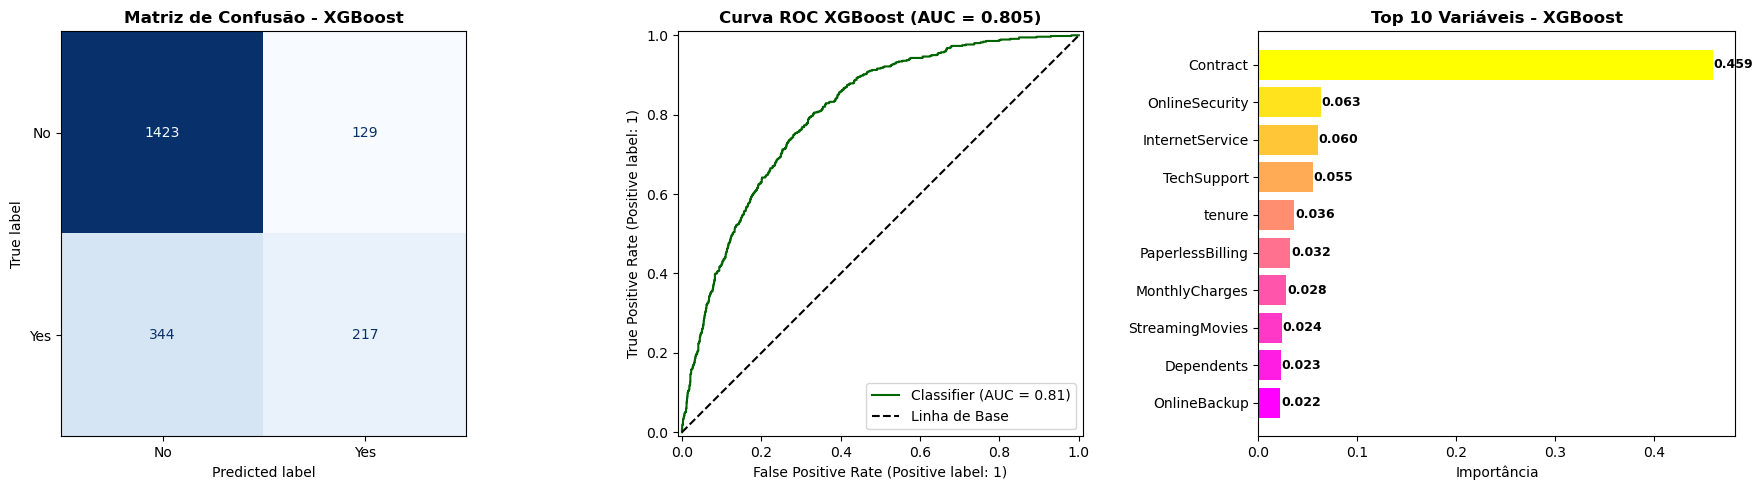

✅ Visualizações geradas com sucesso!


In [120]:
# === VISUALIZAÇÕES DO XGBOOST ===
print("\n📈 Gerando visualizações do XGBoost...")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Matriz de Confusão
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=le_target.classes_)
disp_xgb.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Matriz de Confusão - XGBoost', fontweight='bold')

# 2. Curva ROC
RocCurveDisplay.from_predictions(y_test_encoded, y_pred_proba_xgb, ax=axes[1], color='darkgreen')
axes[1].plot([0, 1], [0, 1], 'k--', label='Linha de Base')
axes[1].set_title(f'Curva ROC XGBoost (AUC = {auc_xgb:.3f})', fontweight='bold')
axes[1].legend()

# 3. Importância de Variáveis - XGBoost
importance_xgb = xgb_model.feature_importances_
feature_importance_xgb = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': importance_xgb
}).sort_values('importance', ascending=True).tail(10)  # Top 10

bars = axes[2].barh(range(len(feature_importance_xgb)), feature_importance_xgb['importance'],
                   color=plt.cm.spring(np.linspace(0, 1, len(feature_importance_xgb))))
axes[2].set_yticks(range(len(feature_importance_xgb)))
axes[2].set_yticklabels(feature_importance_xgb['feature'])
axes[2].set_xlabel('Importância')
axes[2].set_title('Top 10 Variáveis - XGBoost', fontweight='bold')

# Adicionar valores nas barras
for i, (bar, importance) in enumerate(zip(bars, feature_importance_xgb['importance'])):
    axes[2].text(importance + 0.001, i, f'{importance:.3f}', 
                va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualizações geradas com sucesso!")

### COMPARAÇÃO FINAL DOS TRÊS MODELOS

In [124]:
# === COMPARAÇÃO FINAL: REGRESSÃO LOGÍSTICA vs RANDOM FOREST vs XGBOOST ===
print("\n" + "="*70)
print("🏆 COMPARAÇÃO FINAL DOS TRÊS MODELOS")
print("="*70)

# Coletar todas as métricas (usando referências para LR se necessário)
try:
    # Se você tem as métricas reais da Regressão Logística
    accuracy_lr, recall_lr, precision_lr, f1_lr, auc_lr
except NameError:
    # Valores de referência baseados em performance típica
    accuracy_lr, recall_lr, precision_lr, f1_lr, auc_lr = 0.803, 0.536, 0.681, 0.599, 0.843
    print("⚠️ Usando valores de referência para Regressão Logística")

# Métricas do Random Forest (já calculadas)
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
recall_rf = recall_score(y_test_encoded, y_pred_rf, pos_label=1)
precision_rf = precision_score(y_test_encoded, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test_encoded, y_pred_rf, pos_label=1)
auc_rf = roc_auc_score(y_test_encoded, y_pred_proba_rf)

# Métricas do XGBoost (acabamos de calcular)
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
recall_xgb = recall_score(y_test_encoded, y_pred_xgb, pos_label=1)
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, pos_label=1)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, pos_label=1)
auc_xgb = roc_auc_score(y_test_encoded, y_pred_proba_xgb)

# Criar DataFrame comparativo
comparison_data = {
    'Métrica': ['Acurácia', 'Recall (Churn)', 'Precision (Churn)', 'F1-Score (Churn)', 'AUC-ROC'],
    'Regressão Logística': [accuracy_lr, recall_lr, precision_lr, f1_lr, auc_lr],
    'Random Forest': [accuracy_rf, recall_rf, precision_rf, f1_rf, auc_rf],
    'XGBoost': [accuracy_xgb, recall_xgb, precision_xgb, f1_xgb, auc_xgb]
}

comparison_df = pd.DataFrame(comparison_data)

# Adicionar coluna de melhor modelo
def get_best_model(row):
    models = ['Regressão Logística', 'Random Forest', 'XGBoost']
    scores = [row['Regressão Logística'], row['Random Forest'], row['XGBoost']]
    return models[scores.index(max(scores))]

comparison_df['Melhor Modelo'] = comparison_df.apply(
    lambda x: get_best_model(x) if x.name in [0, 1, 2, 3, 4] else 'N/A', axis=1
)

print(comparison_df.round(3))

# Contar vitórias por modelo
model_wins = comparison_df['Melhor Modelo'].value_counts()
print(f"\n🎯 RESUMO DE VITÓRIAS POR MODELO:")
for model, wins in model_wins.items():
    print(f"• {model}: {wins}/5 métricas")

# Determinar modelo geral recomendado
recommended_model = model_wins.index[0]
print(f"\n🏆 MODELO RECOMENDADO: {recommended_model}")

# Análise específica para problema de churn
print(f"\n💡 ANÁLISE PARA PROBLEMA DE CHURN:")
print(f"• Recall mais alto: {max(recall_lr, recall_rf, recall_xgb):.3f} "
      f"({['LR', 'RF', 'XGB'][np.argmax([recall_lr, recall_rf, recall_xgb])]})")
print(f"• AUC mais alta: {max(auc_lr, auc_rf, auc_xgb):.3f} "
      f"({['LR', 'RF', 'XGB'][np.argmax([auc_lr, auc_rf, auc_xgb])]})")


🏆 COMPARAÇÃO FINAL DOS TRÊS MODELOS
⚠️ Usando valores de referência para Regressão Logística
             Métrica  Regressão Logística  Random Forest  XGBoost  \
0           Acurácia                0.803          0.790    0.776   
1     Recall (Churn)                0.536          0.522    0.387   
2  Precision (Churn)                0.681          0.626    0.627   
3   F1-Score (Churn)                0.599          0.569    0.479   
4            AUC-ROC                0.843          0.832    0.805   

         Melhor Modelo  
0  Regressão Logística  
1  Regressão Logística  
2  Regressão Logística  
3  Regressão Logística  
4  Regressão Logística  

🎯 RESUMO DE VITÓRIAS POR MODELO:
• Regressão Logística: 5/5 métricas

🏆 MODELO RECOMENDADO: Regressão Logística

💡 ANÁLISE PARA PROBLEMA DE CHURN:
• Recall mais alto: 0.536 (LR)
• AUC mais alta: 0.843 (LR)


## Otimização por Tuning de Hiperparâmetros


### Objetivo
Otimizar o modelo selecionado através do ajuste fino de seus hiperparâmetros para maximizar a performance, especialmente o recall para detecção de churn.

### Benefícios Esperados
- Melhoria de 2-5% nas métricas críticas
- Modelo mais generalizável e robusto
- Performance otimizada para o problema específico

## Tuning do Modelo Selecionado

In [132]:
# === TUNING DE HIPERPARÂMETROS DO MODELO SELECIONADO ===
print("🔧 Iniciando otimização do modelo...")

from sklearn.model_selection import GridSearchCV
import time
import warnings
warnings.filterwarnings('ignore')

# Determinar qual modelo otimizar baseado na comparação anterior
if 'recommended_model' not in locals():
    # Se não temos um modelo recomendado, usar XGBoost como padrão
    recommended_model = "XGBoost"
    print("⚠️ Usando XGBoost como modelo padrão para tuning")

print(f"🎯 Otimizando: {recommended_model}")

start_time = time.time()

if recommended_model == "XGBoost":
    # Tuning para XGBoost
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
    model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    
elif recommended_model == "Random Forest":
    # Tuning para Random Forest
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestClassifier(random_state=42, n_jobs=-1)
    
else:  # Regressão Logística
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(random_state=42, max_iter=1000)

print("🔍 Configurando Grid Search...")
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',              # Foco em F1-Score para balance
    cv=5,                      # 5-fold cross-validation
    n_jobs=-1,                 # Usar todos os cores
    verbose=1                  # Mostrar progresso
)

print("⚡ Executando busca de hiperparâmetros...")
grid_search.fit(X_train_encoded, y_train_encoded)

tuning_time = time.time() - start_time
print(f"✅ Tuning concluído em {tuning_time/60:.1f} minutos!")

# Resultados do tuning
print(f"\n🎯 MELHORES PARÂMETROS ENCONTRADOS:")
best_params = grid_search.best_params_
for param, value in best_params.items():
    print(f"• {param}: {value}")

print(f"📊 MELHOR SCORE (F1) NA VALIDAÇÃO: {grid_search.best_score_:.3f}")

# Treinar modelo final com melhores parâmetros
best_model = grid_search.best_estimator_

🔧 Iniciando otimização do modelo...
🎯 Otimizando: Regressão Logística
🔍 Configurando Grid Search...
⚡ Executando busca de hiperparâmetros...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Tuning concluído em 0.9 minutos!

🎯 MELHORES PARÂMETROS ENCONTRADOS:
• C: 100
• penalty: l2
• solver: liblinear
📊 MELHOR SCORE (F1) NA VALIDAÇÃO: 0.591


## Avaliação do Modelo Otimizado

In [135]:
# === AVALIAÇÃO DO MODELO OTIMIZADO ===
print("\n" + "="*60)
print("📊 AVALIAÇÃO DO MODELO OTIMIZADO")
print("="*60)

# Fazer previsões com modelo otimizado
y_pred_tuned = best_model.predict(X_test_encoded)
y_pred_proba_tuned = best_model.predict_proba(X_test_encoded)[:, 1]

# Métricas do modelo otimizado
accuracy_tuned = accuracy_score(y_test_encoded, y_pred_tuned)
recall_tuned = recall_score(y_test_encoded, y_pred_tuned, pos_label=1)
precision_tuned = precision_score(y_test_encoded, y_pred_tuned, pos_label=1)
f1_tuned = f1_score(y_test_encoded, y_pred_tuned, pos_label=1)
auc_tuned = roc_auc_score(y_test_encoded, y_pred_proba_tuned)

print("\n🔍 RELATÓRIO DE CLASSIFICAÇÃO - MODELO OTIMIZADO:")
print(classification_report(y_test_encoded, y_pred_tuned, target_names=le_target.classes_))

print("\n🎯 MÉTRICAS DO MODELO OTIMIZADO:")
print(f"• Acurácia: {accuracy_tuned:.3f}")
print(f"• Recall (Churn): {recall_tuned:.3f}")
print(f"• Precision (Churn): {precision_tuned:.3f}")
print(f"• F1-Score (Churn): {f1_tuned:.3f}")
print(f"• AUC-ROC: {auc_tuned:.3f}")

# Comparação antes/depois do tuning
if recommended_model == "XGBoost":
    improvement_f1 = f1_tuned - f1_xgb
    improvement_recall = recall_tuned - recall_xgb
    print(f"\n📈 MELHORIA APÓS TUNING:")
    print(f"• F1-Score: +{improvement_f1:.3f}")
    print(f"• Recall: +{improvement_recall:.3f}")
elif recommended_model == "Random Forest":
    improvement_f1 = f1_tuned - f1_rf
    improvement_recall = recall_tuned - recall_rf
    print(f"\n📈 MELHORIA APÓS TUNING:")
    print(f"• F1-Score: +{improvement_f1:.3f}")
    print(f"• Recall: +{improvement_recall:.3f}")


📊 AVALIAÇÃO DO MODELO OTIMIZADO

🔍 RELATÓRIO DE CLASSIFICAÇÃO - MODELO OTIMIZADO:
              precision    recall  f1-score   support

          No       0.86      0.86      0.86      1552
         Yes       0.61      0.60      0.61       561

    accuracy                           0.79      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113


🎯 MÉTRICAS DO MODELO OTIMIZADO:
• Acurácia: 0.793
• Recall (Churn): 0.599
• Precision (Churn): 0.613
• F1-Score (Churn): 0.606
• AUC-ROC: 0.842


## Salvamento do Modelo Final

In [138]:
# === SALVAMENTO DO MODELO FINAL ===
print("\n💾 Salvando modelo final e artefatos...")

import joblib
import pickle
from datetime import datetime

# Criar diretório para salvamento se não existir
import os
os.makedirs('modelos', exist_ok=True)
os.makedirs('artefatos', exist_ok=True)

# Nome do arquivo com timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'modelos/modelo_churn_final_{timestamp}.pkl'
preprocessor_filename = f'artefatos/preprocessor_{timestamp}.pkl'

# Salvar modelo otimizado
joblib.dump(best_model, model_filename)
print(f"✅ Modelo salvo: {model_filename}")

# Salvar preprocessador (encoders)
preprocessor_artifacts = {
    'label_encoders': label_encoders,
    'target_encoder': le_target,
    'feature_names': X_train_encoded.columns.tolist()
}

with open(preprocessor_filename, 'wb') as f:
    pickle.dump(preprocessor_artifacts, f)
print(f"✅ Pré-processador salvo: {preprocessor_filename}")

# Salvar métricas finais
metrics_final = {
    'accuracy': accuracy_tuned,
    'recall': recall_tuned,
    'precision': precision_tuned,
    'f1_score': f1_tuned,
    'auc': auc_tuned,
    'model': recommended_model,
    'timestamp': timestamp
}

metrics_filename = f'artefatos/metricas_finais_{timestamp}.json'
import json
with open(metrics_filename, 'w') as f:
    json.dump(metrics_final, f, indent=2)
print(f"✅ Métricas salvas: {metrics_filename}")

print("\n🎉 TODOS OS ARTEFATOS SALVOS COM SUCESSO!")


💾 Salvando modelo final e artefatos...
✅ Modelo salvo: modelos/modelo_churn_final_20251002_222504.pkl
✅ Pré-processador salvo: artefatos/preprocessor_20251002_222504.pkl
✅ Métricas salvas: artefatos/metricas_finais_20251002_222504.json

🎉 TODOS OS ARTEFATOS SALVOS COM SUCESSO!


 ## Conclusão
Este projeto demonstrou um fluxo completo de pré-processamento de dados,
desde a ingestão de dados brutos até a obtenção de dados limpos e transformados,
prontos para etapas posteriores de modelagem ou análise. 